In [ ]:
# https://unfinishedgod.netlify.app/2021/06/24/python-cnn%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-fashion-mnist/
# 참고 링크

In [1]:
import sys
import os

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.display import Image
from tensorflow import keras

In [2]:
(X_train, Y_train), (X_val, Y_val) = \
    keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)

In [4]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [6]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [7]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

In [9]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), 
                    epochs=20, 
                    batch_size=200, 
                    verbose=1, 
                    callbacks=[early_stopping_cb, checkpoint_cb])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_val, Y_val)[1]))

Epoch 1/20
300/300 [==============================] - 7s 22ms/step - loss: 0.2514 - accuracy: 0.9087 - val_loss: 0.2574 - val_accuracy: 0.9028
Epoch 2/20
300/300 [==============================] - 7s 25ms/step - loss: 0.2301 - accuracy: 0.9157 - val_loss: 0.2457 - val_accuracy: 0.9110
Epoch 3/20
300/300 [==============================] - 7s 23ms/step - loss: 0.2135 - accuracy: 0.9219 - val_loss: 0.2322 - val_accuracy: 0.9157
Epoch 4/20
300/300 [==============================] - 7s 22ms/step - loss: 0.1983 - accuracy: 0.9265 - val_loss: 0.2189 - val_accuracy: 0.9199
Epoch 5/20
300/300 [==============================] - 8s 27ms/step - loss: 0.1852 - accuracy: 0.9314 - val_loss: 0.2129 - val_accuracy: 0.9242
Epoch 6/20
300/300 [==============================] - 7s 23ms/step - loss: 0.1732 - accuracy: 0.9352 - val_loss: 0.2179 - val_accuracy: 0.9226
Epoch 7/20
313/313 [==============================] - 2s 5ms/step - loss: 0.2129 - accuracy: 0.9242

 Test Accuracy: 0.9242


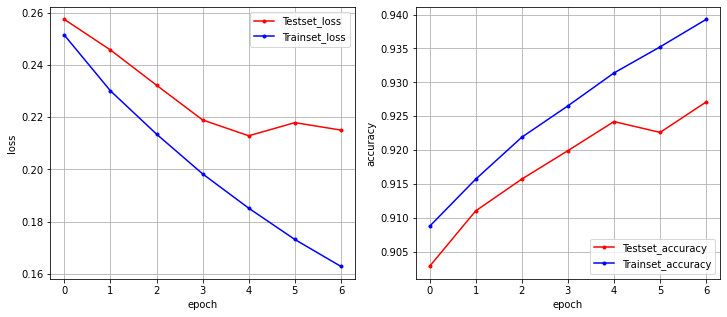

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# 오차
y_vloss = history.history['val_loss']

# 학습셋 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
ax1.plot(x_len, y_vloss, marker = '.', c="red", label='Testset_loss')
ax1.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
ax1.legend(loc='upper right')
ax1.grid()
ax1.set(xlabel='epoch', ylabel='loss')


# 정확도
y_vaccuracy = history.history['val_accuracy']

# 학습셋
y_accuracy = history.history['accuracy']

# 그래프로 표현
x_len = np.arange(len(y_accuracy))
ax2.plot(x_len, y_vaccuracy, marker = '.', c="red", label='Testset_accuracy')
ax2.plot(x_len, y_accuracy, marker = '.', c='blue', label = 'Trainset_accuracy')

# 그래프에 그리드를 주고 레이블을 표시
ax2.legend(loc='lower right')
ax2.grid()

ax2.set(xlabel='epoch', ylabel='accuracy')

# draw gridlines
ax2.grid(True)
plt.show()